Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


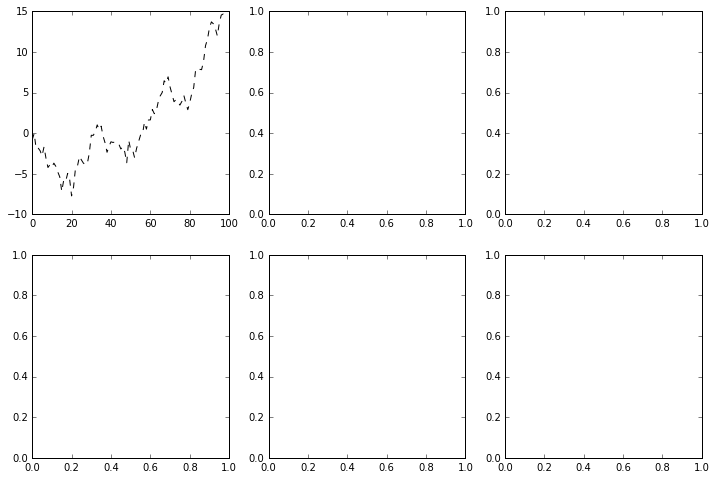

In [84]:
%pylab inline
import matplotlib.pyplot as plt
subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)
fig, axes = plt.subplots(2,3, figsize=(12, 8))
axes[0][0].plot(np.random.randn(100).cumsum(), 'k--') # k-- 表示黑色虚线

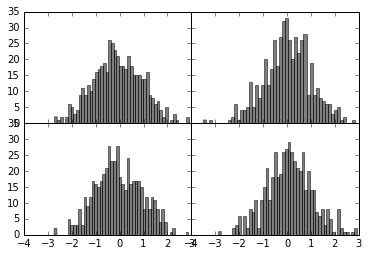

In [72]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True) # sharex,sharey使用相同的x/y刻度
for i in range(2):
    for j in range(2):
        axes[i, j].hist(randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0) # wspace, hspace用于控制宽度和高度的百分比，可以用于subplot之间的间距。

## 颜色、标记和线型
matplotlib中的plot接受一组X和Y坐标，还可以接受一个表示颜色和线型字符串缩写。

    ax.plot(x, y, 'g--')
    ax.plot(x, y, linestyle='--', color='g')

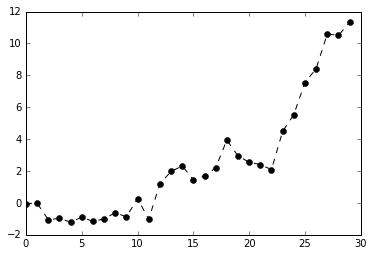

In [73]:
# 线型图可以增加一些标记marker，以强调实际数据点。 需要注意是：标记类型和线型必须放到颜色后面。
plt.plot(randn(30).cumsum(), 'ko--')

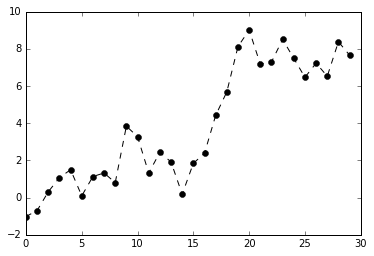

In [74]:
plot(randn(30).cumsum(), color='k', linestyle='--', marker='o') #也可以显示的形式给出。

## 使用不同的drawstyle

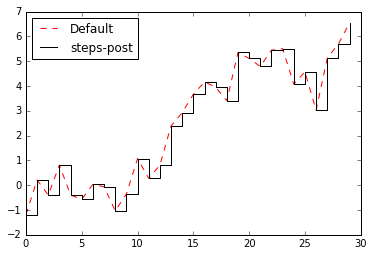

In [75]:
data = randn(30).cumsum()
plt.plot(data, 'r--', label='Default')
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')
plt.legend(loc='best')

## 设置标题、轴标签、刻度以及刻度标签

+ `plt.xlim()`：返回当前x轴的绘图范围
+ `plt.xlim([0, 10])` : 将X轴的范围设置为0-10
+ `ax.get_xlim` 和 `ax.set_xlim`

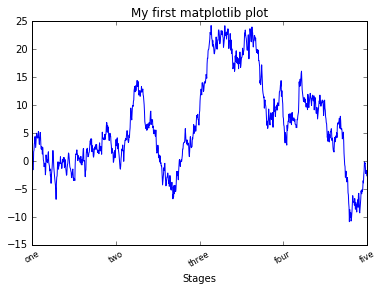

In [81]:
fig=plt.figure(); ax = fig.add_subplot(1,1,1)
ax.plot(randn(1000).cumsum())
ticks = ax.set_xticks([0, 250, 500, 750, 1000]) #修改x轴刻度，返回自身值
_ = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'], rotation=30, fontsize='small') # 也可以使用任何其他值作为标签
ax.set_title('My first matplotlib plot') # 设置标题
ax.set_xlabel('Stages') #设置X轴的标签

## 添加图例
图例(legend)是另外一种用于标识图标元素的重要工具。

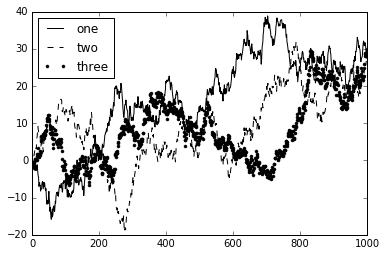

In [89]:
fig = plt.figure(); ax = fig.add_subplot(1,1,1)
ax.plot(randn(1000).cumsum(), 'k', label='one')
ax.plot(randn(1000).cumsum(), 'k--', label='two')
ax.plot(randn(1000).cumsum(), 'k.', label='three')
ax.legend(loc='best') # loc='best' 自动选择合适的放置位置

## 注解以及在Subplot上绘图
自定义一些注解：文本、箭头以及其他图形

text/arrow/annotate函数的操作

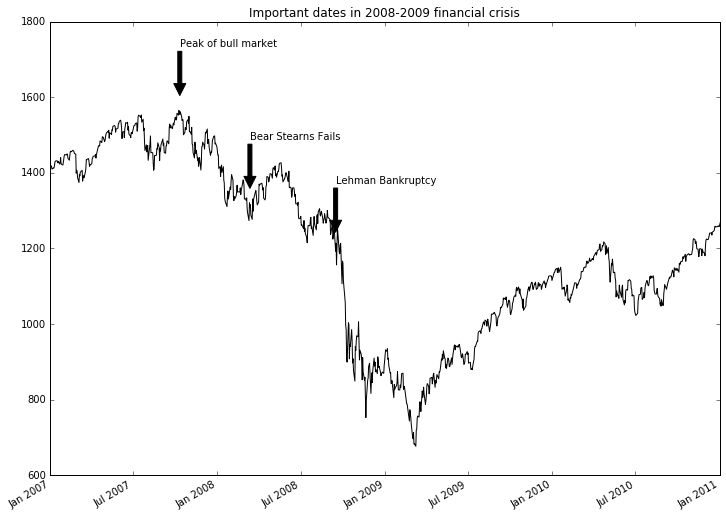

In [95]:
#金融数据标注示例
from datetime import datetime
import pandas as pd
fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot(1, 1, 1)
data= pd.read_csv('spx.csv', index_col=0, parse_dates=True) # parase_dates=True 解析日期
spx = data['SPX']
spx.plot(ax=ax, style='k-')

crisis_data = [(datetime(2007, 10, 11), 'Peak of bull market'),
              (datetime(2008, 3, 12), 'Bear Stearns Fails'),
              (datetime(2008, 9, 15), 'Lehman Bankruptcy')
              ]
# 注解
for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date)+50),
               xytext=(date, spx.asof(date)+200),
               arrowprops=dict(facecolor='black'),
               horizontalalignment='left', verticalalignment='top')

#放大到2007-2010
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])
ax.set_title('Important dates in 2008-2009 financial crisis')